# Carga de Librerias a utilizar

In [47]:
import sys

sys.path.append('src')

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
from helper import Funciones

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
fun= Funciones('../src/conexion.env')

# Lectura de datos

Los datos provienen de una base de datos hecha en mysql.Pero se tiene la opción de tomar los datos de la carpeta "DatasetCrudos".

In [56]:
engine = fun.crear_conexion_mysql()
df_penetracion_poblacion = pd.read_sql_table('internet_penetracion_poblacion', con=engine)

In [57]:
df_penetracion_poblacion.head(3)

,idTabla,año,trimestre,provincia,accesosPor100Habitantes
0,1,2023,4,Buenos Aires,27.68
1,2,2023,4,Capital Federal,47.80
2,3,2023,4,Catamarca,17.46


De acuerdo a los datos buscamos el top 10 de provincias que tienen mas penetración por cada 100 habitantes 

In [58]:
df_penetracion_poblacion.groupby('provincia')['accesosPor100Habitantes'].sum().sort_values(ascending=False).head(10)

provincia
Capital Federal     1843.3367
La Pampa             974.9387
Tierra Del Fuego     966.8689
Buenos Aires         851.5853
Córdoba              848.1780
Santa Fe             810.4280
Neuquén              762.5021
Chubut               689.2897
Río Negro            677.8741
Entre Ríos           630.6577
Name: accesosPor100Habitantes, dtype: float64

In [59]:
#df=df_penetracion_poblacion.groupby(['año','provincia'])['accesosPor100Habitantes'].sum().sort_values(ascending=False)
df = df_penetracion_poblacion.groupby(['año', 'provincia'])['accesosPor100Habitantes'].sum().sort_values(ascending=False).reset_index()

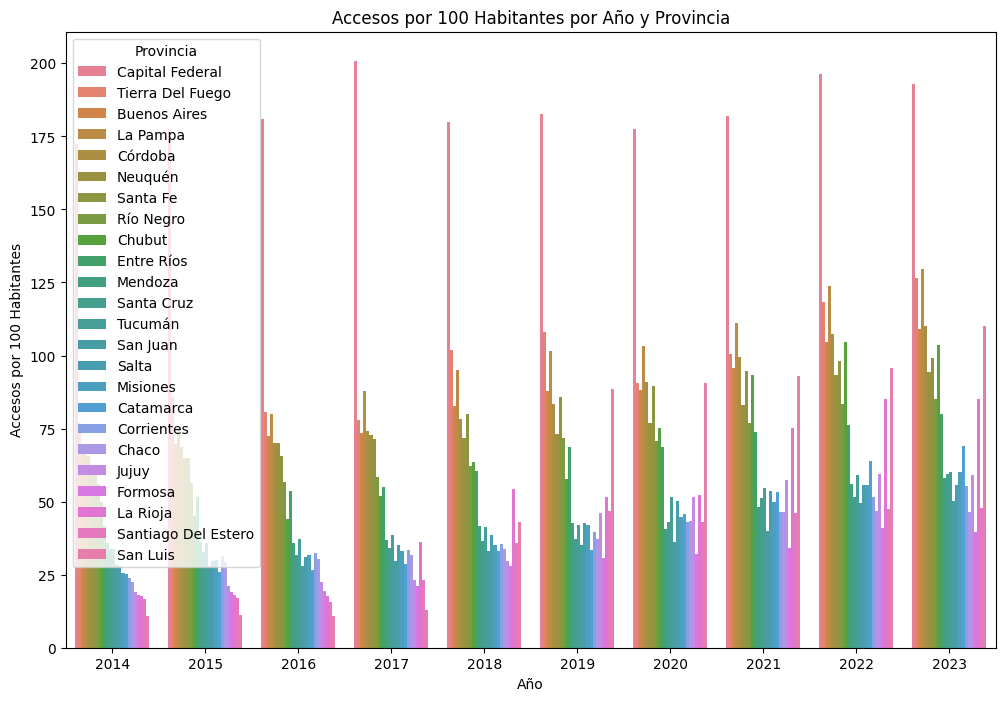

In [60]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras
sns.barplot(x='año', y='accesosPor100Habitantes', hue='provincia', data=df)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Accesos por 100 Habitantes')
plt.title('Accesos por 100 Habitantes por Año y Provincia')
plt.legend(title='Provincia')

# Mostrar la gráfica
plt.show()

Analicé solamnete un año para ver mas claro los datos

In [62]:
df_aux=df_penetracion_poblacion.loc[df_penetracion_poblacion['año']==2023]
df_aux['NoAccesos']=100-df_aux['accesosPor100Habitantes']
df_aux.sort_values(by='NoAccesos', ascending=True)
df_grafica=df_aux.copy()


In [63]:
df_grafica

,idTabla,año,trimestre,provincia,accesosPor100Habitantes,NoAccesos
0,1,2023,4,Buenos Aires,27.68,72.32
1,2,2023,4,Capital Federal,47.80,52.20
2,3,2023,4,Catamarca,17.46,82.54
3,4,2023,4,Chaco,11.85,88.15
4,5,2023,4,Chubut,26.04,73.96
...,...,...,...,...,...,...
91,92,2023,1,Santa Cruz,12.92,87.08
92,93,2023,1,Santa Fe,24.57,75.43
93,94,2023,1,Santiago Del Estero,11.80,88.20
94,95,2023,1,Tierra Del Fuego,30.90,69.10


In [64]:
def divi(fila):
    return fila/4
df_aux.groupby(['provincia'])['accesosPor100Habitantes'].sum().sort_values(ascending=False).apply(divi)


provincia
Capital Federal        48.2250
La Pampa               32.4400
Tierra Del Fuego       31.6500
Córdoba                27.5300
San Luis               27.4850
Buenos Aires           27.2725
Chubut                 25.8650
Santa Fe               24.8275
Neuquén                23.6150
La Rioja               21.3225
Río Negro              21.2525
Entre Ríos             20.0300
Catamarca              17.2200
Tucumán                15.0725
Misiones               15.0450
Santa Cruz             14.8550
Jujuy                  14.7900
Mendoza                14.4875
Salta                  13.9075
Corrientes             13.8100
San Juan               12.5925
Santiago Del Estero    11.9400
Chaco                  11.5750
Formosa                 9.8725
Name: accesosPor100Habitantes, dtype: float64

Por cada 100 habitantes falta casi el 50% de accesos lo cual puede ser el margen de penetración que queda libre y al cual se pudiera accesar para prestar servicios.

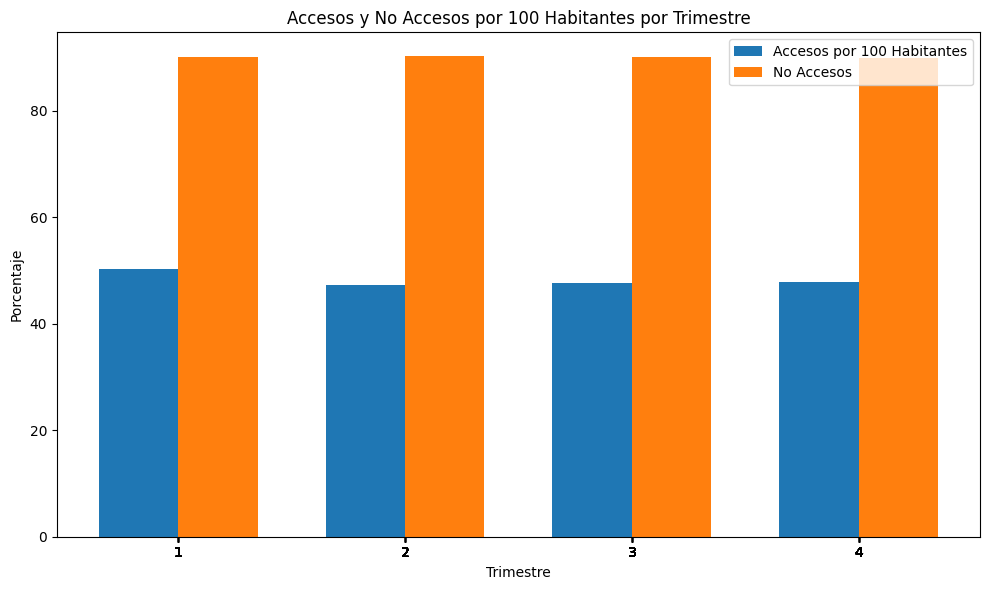

In [65]:
# Configurar el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Establecer las posiciones y el ancho de las barras
bar_width = 0.35
index = df_grafica['trimestre']

# Crear las barras
bar1 = ax.bar(index - bar_width/2, df_grafica['accesosPor100Habitantes'], bar_width, label='Accesos por 100 Habitantes')
bar2 = ax.bar(index + bar_width/2, df_grafica['NoAccesos'], bar_width, label='No Accesos')

# Añadir etiquetas y título
ax.set_xlabel('Trimestre')
ax.set_ylabel('Porcentaje')
ax.set_title('Accesos y No Accesos por 100 Habitantes por Trimestre')
ax.set_xticks(index)
ax.set_xticklabels(df_grafica['trimestre'])
ax.legend()

# Añadir etiquetas a las barras
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#add_labels(bar1)
#add_labels(bar2)

# Mostrar el gráfico
plt.tight_layout()
plt.show()